In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "C:\\Users\\vma4kor\\mnist-neuralnetworkv2\\data\\"
train_data = np.loadtxt(data_path + "mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", 
                       delimiter=",") 

In [5]:
fac = 255  *0.99 + 0.01
train_imgs = np.asfarray(train_data[:, 1:]) / fac
test_imgs = np.asfarray(test_data[:, 1:]) / fac
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

In [6]:
import numpy as np
lr = np.arange(10)
for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


In [7]:
lr = np.arange(no_of_different_labels)
# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float)
test_labels_one_hot = (lr==test_labels).astype(np.float)
# we don't want zeroes and ones in the labels neither:
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

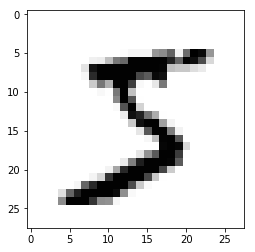

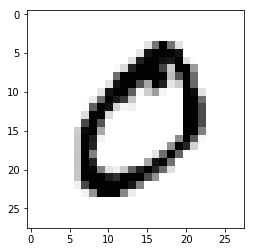

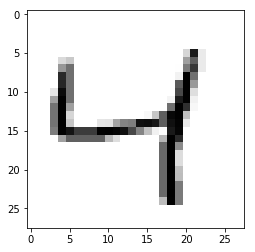

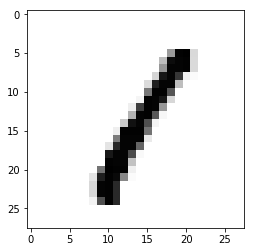

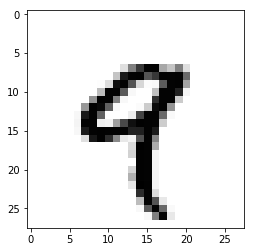

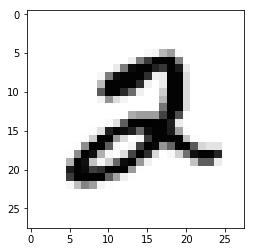

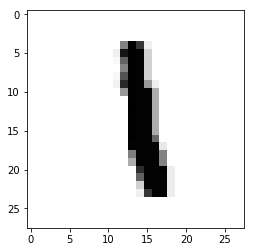

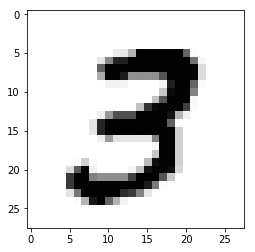

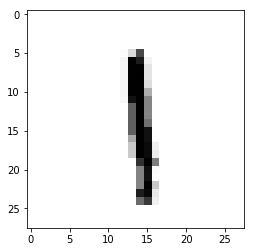

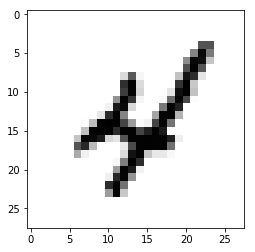

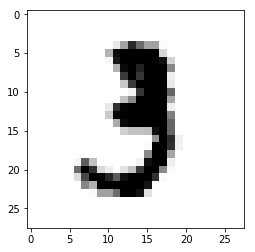

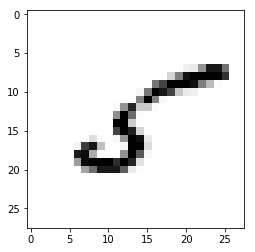

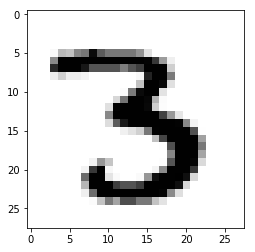

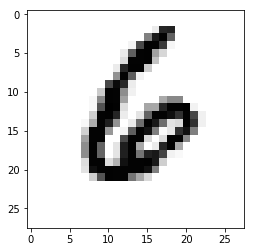

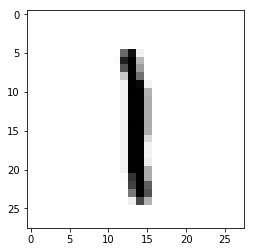

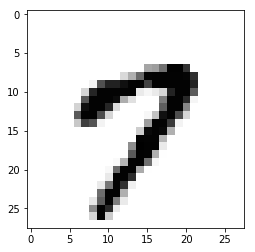

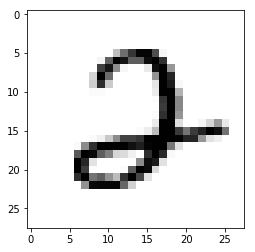

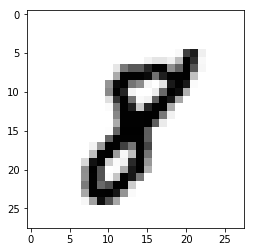

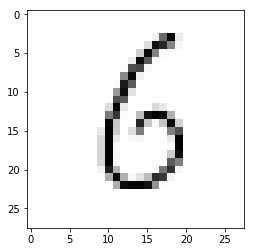

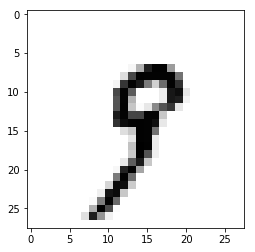

In [8]:
for i in range(20):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [9]:
import pickle
with open("C:\\Users\\vma4kor\\mnist-neuralnetworkv2\\data\\pickled_mnist.pkl", "bw") as fh:
    data = (train_imgs, 
            test_imgs, 
            train_labels,
            test_labels,
            train_labels_one_hot,
            test_labels_one_hot)
    pickle.dump(data, fh)

In [10]:
import pickle
with open("C:\\Users\\vma4kor\\mnist-neuralnetworkv2\\data\\pickled_mnist.pkl", "br") as fh:
    data = pickle.load(fh)
train_imgs = data[0]
test_imgs = data[1]
train_labels = data[2]
test_labels = data[3]
train_labels_one_hot = data[4]
test_labels_one_hot = data[5]
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

In [22]:
import numpy as np
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, 
                     (upp - mean) / sd, 
                     loc=mean, 
                     scale=sd)
class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, 
                             sd=1, 
                             low=-rad, 
                             upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, 
                             sd=1, 
                             low=-rad, 
                             upp=rad)
        self.who = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
        
    
    def train_single(self, input_vector, target_vector):
        """
        input_vector and target_vector can be tuple, 
        list or ndarray
        """
        
        output_vectors = []
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.wih, 
                                input_vector)
        output_hidden = activation_function(output_vector1)
        
        output_vector2 = np.dot(self.who, 
                                output_hidden)
        output_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_network
        # update the weights:
        tmp = output_errors * output_network * \
              (1.0 - output_network)     
        tmp = self.learning_rate  * np.dot(tmp, 
                                           output_hidden.T)
        self.who += tmp
        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T, 
                               output_errors)
        # update the weights:
        tmp = hidden_errors * output_hidden * (1.0 - output_hidden)
        self.wih += self.learning_rate * np.dot(tmp, input_vector.T)
        
    def train(self, data_array, 
              labels_one_hot_array,
              epochs=1,
              intermediate_results=False):
        intermediate_weights = []
        for epoch in range(epochs):  
            print("*", end="")
            for i in range(len(data_array)):
                self.train_single(data_array[i], 
                                  labels_one_hot_array[i])
            if intermediate_results:
                intermediate_weights.append((self.wih.copy(), 
                                             self.who.copy()))
        return intermediate_weights        
            
   
    
    def run(self, input_vector):
        """ input_vector can be tuple, list or ndarray """
        
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.wih, 
                               input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.who, 
                               output_vector)
        output_vector = activation_function(output_vector)
        
        print("output_vector",output_vector)
        return output_vector
    
    def confusion_matrix(self, data_array, labels):
        cm = np.zeros((10, 10), int)
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            cm[res_max, int(target)] += 1
        return cm    
    
    def precision(self, label, confusion_matrix):
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs
    
    def runNew(self, input_vector, ihweights, howeights):
        """ input_vector can be tuple, list or ndarray """
        
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(ihweights, 
                               input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(howeights, 
                               output_vector)
        output_vector = activation_function(output_vector)
        print("output_vector",output_vector)
        return output_vector
    
    def confusion_matrixNew(self, data_array, labels, ihweights,howeights):
        cm = np.zeros((10, 10), int)
        for i in range(len(data_array)):
            res = self.runNew(data_array[i],ihweights,howeights)
            res_max = res.argmax()
            target = labels[i][0]
            cm[res_max, int(target)] += 1
        return cm 

    def evaluateNew(self, data, labels,ihweights,howeights):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.runNew(data[i],ihweights,howeights)
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

In [23]:
epochs = 20
ANN = NeuralNetwork(no_of_in_nodes = image_pixels, 
                               no_of_out_nodes = 10, 
                               no_of_hidden_nodes = 50,
                               learning_rate = 0.2)

#ANN = NeuralNetwork(network_structure=[image_pixels, 80, 80, 10],
                               #learning_rate=0.01,
                              # bias=None)x

In [24]:
#weights = ANN.train(train_imgs, train_labels_one_hot, epochs=epochs)
weights = ANN.train(train_imgs, 
                    train_labels_one_hot, 
                    epochs=epochs, 
                    intermediate_results=True)
#print(weights)

********************

In [36]:
'''
for i in range(epochs):  
    if i==49 :
        print("epoch: ", i)
        ANN.wih = weights[i][0]
        #ANN.who = weights[i][1]
        print("wih: ", ANN.wih)
        #print("who: ", ANN.who)
        corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
        print("accruracy train: ", corrects / ( corrects + wrongs))
        corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
        print("accruracy: test", corrects / ( corrects + wrongs))
'''

epoch:  49
wih:  [[ 0.00614019  0.00698637  0.02808943 ... -0.02322949 -0.00244659
   0.02712446]
 [ 0.03193556 -0.02850269  0.01080245 ...  0.01069915  0.01120548
   0.00964234]
 [-0.01348802 -0.01520576  0.01392376 ... -0.03400509  0.00956117
   0.0332978 ]
 ...
 [ 0.01100111  0.02801132 -0.03146583 ... -0.01040507 -0.01240561
   0.03367426]
 [ 0.01215724  0.02889363  0.01270408 ... -0.01677305  0.01892434
  -0.00878538]
 [ 0.01357551  0.00515492  0.01755778 ... -0.02004331  0.00974453
  -0.01998897]]
accruracy train:  0.9756666666666667
accruracy: test 0.9483


In [11]:
'''
#print("wih: ", ANN.wih)
print("wih shape", ANN.wih.shape)
print("wih shape", ANN.wih[0])
'''    

wih shape (100, 784)
wih shape [ 9.39930725e-03 -5.75710684e-03  1.98916963e-02  2.86166461e-02
  2.39049058e-02  3.15023254e-03 -8.34056497e-03 -1.33865122e-02
  1.50501518e-03  1.87392986e-02  1.34464620e-02 -2.21448951e-02
  1.04293881e-02 -2.16282501e-02  3.28965185e-02  7.79914510e-03
 -2.91345417e-02  2.37448488e-02 -1.42012076e-02 -1.68066708e-02
  2.60195829e-02  5.55255730e-03 -2.26885144e-02 -2.08893679e-02
  3.52869744e-02  1.94883548e-02 -7.29639705e-03 -8.56190890e-03
 -7.40609355e-03 -8.91873350e-03  2.80948385e-02  3.01699344e-03
 -2.57080539e-02  1.06732365e-02  1.93092309e-02 -1.91383088e-02
 -2.83313627e-02 -3.16560935e-02 -4.17252929e-03  1.57608537e-02
 -2.89745966e-02 -6.74629640e-04  2.36990995e-03  6.90309744e-03
 -1.44861641e-02  7.10157518e-03  7.55105000e-03 -3.07988770e-03
  1.16459126e-03  1.55986786e-02  2.98116771e-02 -1.18928564e-02
 -6.32124226e-03 -2.82505636e-02 -2.40769732e-02  7.90326914e-03
  1.20668193e-02 -2.86661421e-02 -1.19599959e-02 -3.2602047

In [38]:
#print("who: ", ANN.who)
#print("who shape", ANN.who.shape)

In [21]:
trcorrects,trwrongs = ANN.evaluate(train_imgs, train_labels)
print("accruracy train: ", trcorrects / ( trcorrects + trwrongs))
tecorrects, tewrongs = ANN.evaluate(test_imgs, test_labels)
print("accruracy: test", tecorrects / ( tecorrects + tewrongs))

accruracy train:  0.9577833333333333
accruracy: test 0.9442


In [15]:

cmtrain = ANN.confusion_matrix(train_imgs, train_labels)
print(cmtrain)
for i in range(10):
    print("digit: ", i, "precision: ", ANN.precision(i, cmtrain), "recall: ", ANN.recall(i, cmtrain))


[[5828    0   47   16   24   10   38   11   23   27]
 [   2 6605   25   30   14   19   28   21   59   15]
 [   8   22 5683   46    8    9   15   49   15   10]
 [  19    6   54 5702    2   73    7    5   65   41]
 [   7    7   16    7 5619   15   21   23   13  125]
 [   8    9   17  147    2 5145   36   11   32   30]
 [   8    0   17    4   24   29 5699    1   17    2]
 [   3   13   36   44    7    9    0 6017   12   40]
 [  30   75   56   94   16   68   73   39 5592   82]
 [  10    5    7   41  126   44    1   88   23 5577]]
digit:  0 precision:  0.9839608306601384 recall:  0.9674634794156707
digit:  1 precision:  0.9796796202907149 recall:  0.9687591669111176
digit:  2 precision:  0.9538435716683451 recall:  0.9689684569479966
digit:  3 precision:  0.9300277279399771 recall:  0.9544693672581185
digit:  4 precision:  0.9618281410475864 recall:  0.9600205023065095
digit:  5 precision:  0.9490868843386829 recall:  0.9462939120838698
digit:  6 precision:  0.9629942548158161 recall:  0.982

In [41]:
'''
cmtest = ANN.confusion_matrix(test_imgs, test_labels)
print(cmtest)
for i in range(10):
    print("digit: ", i, "precision: ", ANN.precision(i, cmtest), "recall: ", ANN.recall(i, cmtest))
'''

[[ 959    0   10    4    3    6    8    1    7    7]
 [   1 1124    6    3    5    0    2    7    5   10]
 [   2    3  970   17    3    0    4   14   12    3]
 [   1    0   10  936    0   29    0    6    8    8]
 [   1    0    3    1  933    3    0    6    6   24]
 [   4    2    1   26    0  818    9    0    1   10]
 [   2    3    8    0    4   10  924    0   10    1]
 [   3    0    6    4    3    4    1  973    7    7]
 [   6    3   16    8    7   15    9    5  914    7]
 [   1    0    2   11   24    7    1   16    4  932]]
digit:  0 precision:  0.9785714285714285 recall:  0.954228855721393
digit:  1 precision:  0.9903083700440528 recall:  0.9664660361134996
digit:  2 precision:  0.939922480620155 recall:  0.943579766536965
digit:  3 precision:  0.9267326732673268 recall:  0.9378757515030061
digit:  4 precision:  0.9501018329938901 recall:  0.95496417604913
digit:  5 precision:  0.9170403587443946 recall:  0.939150401836969
digit:  6 precision:  0.964509394572025 recall:  0.9604989604

In [16]:
#'tests by changing wight matrices'
ihweights = ANN.wih
howeights = ANN.who


a=np.array(ihweights)

# result as a numpy array
b=-a

# can be casted back to list
#c=list(b)
#print("--new weights")
#print(b)

print("orig wihweights", a)

print("flip wihweights", b)

c=np.array(howeights)

# result as a numpy array
d=-c
howeights=d

print("orig whoweights", c)

print("flip whoweights", d)


orig wihweights [[ 0.03544644 -0.02784975 -0.01896066 ... -0.01104144  0.01185713
  -0.02671282]
 [ 0.02695826  0.03081311  0.00545077 ... -0.02402704 -0.03279917
   0.01314159]
 [-0.00108412  0.01383815 -0.0235457  ... -0.03536636 -0.02187903
   0.02891812]
 ...
 [ 0.01685027 -0.00135603  0.02564401 ... -0.03433297  0.02850883
   0.03065008]
 [ 0.0336439  -0.00767431 -0.03450397 ...  0.00547576 -0.00771265
   0.03484854]
 [-0.02285748 -0.01233784  0.00256322 ... -0.01112812 -0.02141174
   0.02743546]]
flip wihweights [[-0.03544644  0.02784975  0.01896066 ...  0.01104144 -0.01185713
   0.02671282]
 [-0.02695826 -0.03081311 -0.00545077 ...  0.02402704  0.03279917
  -0.01314159]
 [ 0.00108412 -0.01383815  0.0235457  ...  0.03536636  0.02187903
  -0.02891812]
 ...
 [-0.01685027  0.00135603 -0.02564401 ...  0.03433297 -0.02850883
  -0.03065008]
 [-0.0336439   0.00767431  0.03450397 ... -0.00547576  0.00771265
  -0.03484854]
 [ 0.02285748  0.01233784 -0.00256322 ...  0.01112812  0.02141174


In [17]:
newweights_ih = b
newweights_ho = d
trcorrects,trwrongs = ANN.evaluateNew(train_imgs, train_labels, newweights_ih,newweights_ho)
print("accruracy train: ", trcorrects / ( trcorrects + trwrongs))
tecorrects, tewrongs = ANN.evaluateNew(test_imgs, test_labels,newweights_ih,newweights_ho)
print("accruracy: test", tecorrects / ( tecorrects + tewrongs))


accruracy train:  0.13055
accruracy: test 0.1238


'\n#cmtrain = ANN.confusion_matrixNew(train_imgs, train_labels,newweights)\n#print(cmtrain)\n\nfor i in range(10):\n    print("digit: ", i, "precision: ", ANN.precision(i, cmtrain), "recall: ", ANN.recall(i, cmtrain))\ncmtest = ANN.confusion_matrixNew(test_imgs, test_labels,newweights)\n#print(cmtest)\nfor i in range(10):\n    print("digit: ", i, "precision: ", ANN.precision(i, cmtest), "recall: ", ANN.recall(i, cmtest))\n'

In [56]:
print('end')

end


In [ ]:
print(len(c))
print(c)

In [ ]:
nums=[1,2,3,4,5,6]  
print("---",nums)

#any list 
#print([nums[i^1] for i in range(len(nums))])

#nums1 = [nums[i^1] for i in range(len(nums))]
#print("---",nums1)
np.set_printoptions(threshold=np.inf)

def swap_list_pairwise(lis):
    """Pairwise swap of all elements in a list.

    If the number of elements is odd, the leftover element
    stays at its place.
    """
    length = len(lis)  
    # Stop at second last if length is odd, otherwise use full list. 
    end = length - 1 if length % 2 else length
    lis[1:end:2], lis[:end:2] = lis[:end:2], lis[1:end:2]
    return lis

def pairwise_swap(iterable):
    for i, value in enumerate(iterable):
        if i % 2 == 0:
            saved = value
        else:
            yield value
            yield saved
        
#print(nums1)
c1 = swap_list_pairwise(nums)
print("----------------------------------------------------------------------")
#print(c)

#n = pairwise_swap(nums)   
#nums = weights # np.array(weights)
#seq=nums
#print("seq----------------------------------------------------------------------")
#print(seq)

seq = []
distance_to_move = 0
i1 = [nums[(i +distance_to_move ) % len(nums)] for i in range(len(nums))] 
print(i1)

In [ ]:
distance_to_move =0
w2 =[]
for i in range(len(weights[0])):
    nums = weights[0][i]
    i1 = [nums[(i +distance_to_move ) % len(nums)] for i in range(len(nums))] 
    w2.append(i1)
print(w2)

In [ ]:
l1=[-3.12639458e-02,-2.61469173e-02,  6.77104189e-04,  3.29666114e-02,
  2.51148086e-02,  1.29396160e-02,  2.74556352e-02, -1.20307740e-02,0.9]

In [ ]:
nums = l1

In [75]:
def pairwiseswap(lst):
    def swap(l1):
        res = []
        for i in range(0,len(l1)-1,2):
            res.append(l1[i+1])
            res.append(l1[i])
        return res

    res = []
    if len(lst)%2==0:
        res = swap(lst)
    else:
        res = swap(lst)
        res.append(lst[len(lst)-1])
    return res